In [5]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import scipy.interpolate
import time
import math


# Exercício 1

[ 0.66666667 -2.          0.33333333  1.        ]


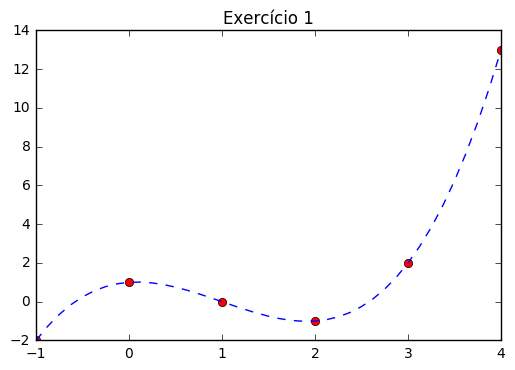

In [6]:
A = [[0,1,8,27],[0,1,4,9],[0,1,2,3],[1,1,1,1]]
A = np.matrix(A).T

b = [1,0,-1,2]

resposta = np.linalg.solve(A, b)
print(resposta)

#Plotando o Polinomial
valores_x = [x for x in range(-1,5)]
poly_y = []

for x in valores_x:
    poly_y.append(resposta[3]+ resposta[2]*(x**1) + resposta[1]*(x**2) + resposta[0]*(x**3))
    
f3 = scipy.interpolate.interp1d(valores_x, poly_y, kind='cubic')
xnew = np.linspace(-1, 4, num=41, endpoint=True)

plt.plot(valores_x, poly_y, 'ro', xnew, f3(xnew), '--')
plt.title('Exercício 1')
plt.show()

# Exercício 6

In [7]:
def resolve_triangular(matriz, lista_b):
    tamanho_matriz = len(matriz)

    # Gera uma lista para receber os valores de x1,x2,x3,etc
    lista_x = [0 for x in range(0, tamanho_matriz)]
    counter = 0
    for index_x in range(0, len(matriz)):
        soma = 0
        for index_y in range(0, counter):
            soma = soma + (lista_x[-index_y - 1] * matriz[-index_x - 1][-index_y - 1])

        lista_x[-index_x - 1] = (lista_b[-index_x - 1] - soma) / matriz[-index_x - 1][-counter - 1]
        counter = counter + 1
    return lista_x

#Gerando uma matriz aleatória para testar o código
tamanho_matriz = 3
matriz = np.tril(np.random.random((tamanho_matriz, tamanho_matriz)), 0).T
lista_b = []
lista_b.append(np.matrix(np.random.random((tamanho_matriz, 1))))
lista_b = lista_b[0]

lista_x = resolve_triangular(matriz, lista_b)

#Comparando solução com pacote do scipy
print(lista_x)
print(scipy.linalg.solve_triangular(matriz, lista_b))

[matrix([[ 1.02305771]]), matrix([[-0.97581438]]), matrix([[ 0.80349429]])]
[[ 1.02305771]
 [-0.97581438]
 [ 0.80349429]]


## Comentários Ex 6

Na função resolve_triangular() é possível observar que são utilizados dois loops de tipo for. O primeiro deles, para passar nas linhas da matriz e o segundo nas colunas da matriz. Como o segundo loop está "dentro" do primeiro, ele é executado para as todas as (n) colunas para cada uma das (n) linhas. Logo, esse algoritmo tem complexidade n^2

In [8]:
def tolog(x):
    for index in range(0,len(x)):
        x[index] = math.log(x[index])
    return (x)

# Exercício 7

Crescimento Cubico:  3.0
Inversão de Matriz:  1.80288599947


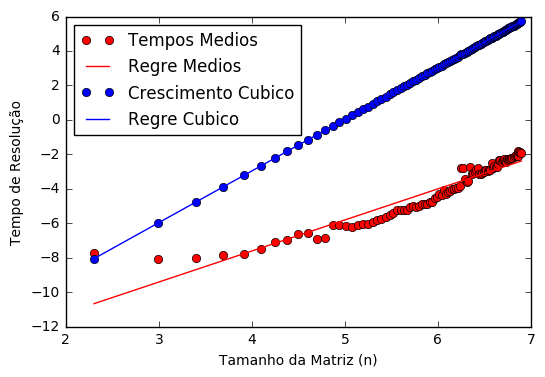

In [17]:
n = 1000 #tamanho maximo da matriz. 

tempos_medios = [0 for x in range(0,int(n/10)-1)]

loops_media = 5
for i in range(0,loops_media):
    
    valor_inicial = 10
    lista_matrizes = []
    lista_b = []
    lista_tempos = []
    lista_n = []

    while valor_inicial<n:

        lista_matrizes.append(np.matrix(np.random.random((valor_inicial,valor_inicial))))
        lista_b.append(np.matrix(np.random.random((valor_inicial,1))))
        lista_n.append(valor_inicial)
        valor_inicial = valor_inicial + 10

    for index in range(0,len(lista_n)):

        #Calculando tempo para a inversão da matriz e multiplicação pelo vetor b
        tempo_inicial = time.time()
        a  = (lista_matrizes[index].I)*(lista_b[index])
        tempo_final = time.time()
        
        lista_tempos.append(tempo_final-tempo_inicial)

    for index in range(0,len(lista_tempos)):
        tempos_medios[index] = tempos_medios[index] + lista_tempos[index]

for index in range(0,len(tempos_medios)):
    tempos_medios[index] = tempos_medios[index]/loops_media

#Simulando crescimento cubico a partir do menor valor do tempo médio
a = min(tempos_medios)/(10**3)
crescimento_cubico = [(a*(n**3)) for n in lista_n]

lista_n = tolog(lista_n)
tempos_medios = tolog(tempos_medios)
crescimento_cubico = tolog(crescimento_cubico)

coef_tempos = np.polyfit(lista_n,tempos_medios,deg=1)
poly_tempos = np.poly1d(coef_tempos)

coef_cubico = np.polyfit(lista_n,crescimento_cubico,deg=1)
poly_cubico = np.poly1d(coef_cubico)

print ('Crescimento Cubico: ',coef_cubico[0])
print ('Inversão de Matriz: ',coef_tempos[0])


plt.plot(lista_n,tempos_medios,'ro')
plt.plot(lista_n, poly_tempos(lista_n), color='r')
plt.plot(lista_n,crescimento_cubico,'bo')
plt.plot(lista_n, poly_cubico(lista_n), color='b')
plt.xlabel('Tamanho da Matriz (n)')
plt.ylabel('Tempo de Resolução')

plt.legend(['Tempos Medios', 'Regre Medios', 'Crescimento Cubico',
           'Regre Cubico'], loc='best')

plt.show()

## Comentarios Ex 7

Calculado apenas até n=1000 pois meu notebook de 2011 não está aguentando calcular até n=2000. O valor da regressao para estimar a taxa de crescimento está provavelmente subestimada por esse motivo.

Para a resolução da matriz, foi utilizado o método de inversão seguido de multiplicação pelo vetor b. Para calcular o tempo para resolver o sistema, o processo foi repetido 5 vezes e tirada uma média do tempo de cada n. Para simular crescimento cúbico, foi utilizado o menor valor de todos os tempos como inicial. No gráfico, é tambémm possível observar que o crescimento do tempo é bem menor que o crescimento de tempo cúbico simulado.